In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Import dataset
player_df = pd.read_csv("./basic_info.csv")
player_df = player_df.drop(['Unnamed: 0'], axis=1)
# Duplicamos el df
df = player_df
# Quitamos 'Unnamed: 0' que esta mal en este DF
df = df.drop(['Contract', 'Name'], axis=1)
df.head()

,ID,Age,Nationality,Overall,Potential,Club,Value,Wage,Total stat
0,236988,22,England,72,79,Arsenal,€4.8M,€45K,1698
1,225863,23,France,77,82,PSV,€14.5M,€15K,1961
2,241721,22,Portugal,82,90,AC Milan,€68.5M,€52K,1959
3,224371,24,England,79,82,West Ham United,€24M,€63K,1966
4,200104,28,Korea Republic,89,89,Tottenham Hotspur,€104M,€240K,2141


In [3]:
def clean_data_money(df):
    temp_data = df.str.replace('[M, K, €]', '').astype(float)
    for values, indx in zip(df, df.index):
        if values[-1] == 'M':
            temp_data[indx] = temp_data[indx] * 1000000
        elif values[-1] == 'K':
            temp_data[indx] = temp_data[indx] * 1000
        else:
            pass
    return temp_data
df['Value'] = clean_data_money(df['Value'])
df.head()

/tmp/ipykernel_16837/2141859909.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  temp_data = df.str.replace('[M, K, €]', '').astype(float)


,ID,Age,Nationality,Overall,Potential,Club,Value,Wage,Total stat
0,236988,22,England,72,79,Arsenal,4800000.0,€45K,1698
1,225863,23,France,77,82,PSV,14500000.0,€15K,1961
2,241721,22,Portugal,82,90,AC Milan,68500000.0,€52K,1959
3,224371,24,England,79,82,West Ham United,24000000.0,€63K,1966
4,200104,28,Korea Republic,89,89,Tottenham Hotspur,104000000.0,€240K,2141


In [4]:
df['Wage'] = clean_data_money(df['Wage'])
df.head()

/tmp/ipykernel_16837/2141859909.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  temp_data = df.str.replace('[M, K, €]', '').astype(float)


,ID,Age,Nationality,Overall,Potential,Club,Value,Wage,Total stat
0,236988,22,England,72,79,Arsenal,4800000.0,45000.0,1698
1,225863,23,France,77,82,PSV,14500000.0,15000.0,1961
2,241721,22,Portugal,82,90,AC Milan,68500000.0,52000.0,1959
3,224371,24,England,79,82,West Ham United,24000000.0,63000.0,1966
4,200104,28,Korea Republic,89,89,Tottenham Hotspur,104000000.0,240000.0,2141


In [5]:
df.head()

,ID,Age,Nationality,Overall,Potential,Club,Value,Wage,Total stat
0,236988,22,England,72,79,Arsenal,4800000.0,45000.0,1698
1,225863,23,France,77,82,PSV,14500000.0,15000.0,1961
2,241721,22,Portugal,82,90,AC Milan,68500000.0,52000.0,1959
3,224371,24,England,79,82,West Ham United,24000000.0,63000.0,1966
4,200104,28,Korea Republic,89,89,Tottenham Hotspur,104000000.0,240000.0,2141


In [6]:
# Create X (all the feature columns)
X = df.drop("Overall", axis=1)

# Create y (the target column)
y = df["Overall"]

In [7]:
X

,ID,Age,Nationality,Potential,Club,Value,Wage,Total stat
0,236988,22,England,79,Arsenal,4800000.0,45000.0,1698
1,225863,23,France,82,PSV,14500000.0,15000.0,1961
2,241721,22,Portugal,90,AC Milan,68500000.0,52000.0,1959
3,224371,24,England,82,West Ham United,24000000.0,63000.0,1966
4,200104,28,Korea Republic,89,Tottenham Hotspur,104000000.0,240000.0,2141
...,...,...,...,...,...,...,...,...
19820,245534,18,England,64,Tranmere Rovers,80000.0,500.0,1506
19821,245535,26,Turkey,74,Yukatel Kayserispor,2200000.0,15000.0,2008
19822,245536,19,Italy,70,Frosinone,200000.0,2000.0,1385
19823,245540,23,Greece,74,AEK Athens,1900000.0,500.0,1589


In [8]:
y

0        72
1        77
2        82
3        79
4        89
         ..
19820    52
19821    71
19822    57
19823    69
19824    64
Name: Overall, Length: 19825, dtype: int64

In [9]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Nationality', 'Club'] # columnas que queremos transformar en nums
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                  one_hot,
                                  categorical_features)], # aqui le pasamos la columnas
                                  remainder='passthrough') # esto es para no alterar el resto de columnas
transformed_X = transformer.fit_transform(X)
transformed_X

<19825x1102 sparse matrix of type '<class 'numpy.float64'>'
	with 157896 stored elements in Compressed Sparse Row format>

In [10]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size=0.2)
# View the data shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15860, 1102), (3965, 1102), (15860,), (3965,))

In [11]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [44]:
model.score(X_test, y_test), model.score(X_train, y_train)

(0.9859814201696948, 0.998008388920176)

In [51]:
import sklearn.metrics
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [52]:
from sklearn.model_selection import cross_validate

scoring = {'r2': 'r2',
           'MAE': 'neg_mean_absolute_error',
           'MSE': 'neg_mean_squared_error'}
scores = cross_validate(model, transformed_X, y, scoring=scoring,
                         cv=5, return_train_score=True)
print(scores.keys())

dict_keys(['fit_time', 'score_time', 'test_r2', 'train_r2', 'test_MAE', 'train_MAE', 'test_MSE', 'train_MSE'])


In [53]:
scores

{'fit_time': array([28.40564895, 29.05606174, 27.95842457, 26.80533981, 25.11548877]),
 'score_time': array([0.03657675, 0.04052305, 0.04466844, 0.04529428, 0.04134154]),
 'test_r2': array([0.96556187, 0.97590337, 0.97737579, 0.95704402, 0.93002692]),
 'train_r2': array([0.99693514, 0.99812159, 0.99806507, 0.99811878, 0.99858296]),
 'test_MAE': array([-0.62834552, -0.39750567, -0.43107692, -0.54165195, -0.91956368]),
 'train_MAE': array([-0.18390164, -0.17854477, -0.17643695, -0.16899054, -0.13826419]),
 'test_MSE': array([-1.66856265, -0.90762066, -0.79639718, -1.13669203, -2.1754768 ]),
 'train_MSE': array([-0.1331313 , -0.11849885, -0.12181794, -0.12115042, -0.09164664])}

In [54]:
for key, values in scores.items():
    print(f'{key} --> {values.mean()}')

fit_time --> 27.468192768096923
score_time --> 0.04168081283569336
test_r2 --> 0.961182392120888
train_r2 --> 0.9979647086061216
test_MAE --> -0.5836287515762927
train_MAE --> -0.16922761664564961
test_MSE --> -1.3369498612862547
train_MSE --> -0.11724903026481714


In [17]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_test)
mean_error = mean_absolute_error(y_test, y_pred)
mean_error

0.466814627994956

In [34]:
from sklearn.metrics import mean_squared_error

cv_mse2 = mean_squared_error(y_test, y_pred)
cv_mse2

0.8331334678436318

In [26]:
mean_error_df = pd.DataFrame(data={'y_test':y_test,
                                  'y_pred':y_pred})
mean_error_df

,y_test,y_pred
16845,52,52.14
8592,61,61.00
16295,55,56.54
7241,74,71.48
9909,62,63.25
...,...,...
3037,78,78.02
13512,62,62.18
18809,61,57.79
16679,58,61.87


In [27]:
for index, row in mean_error_df.iterrows():
    if not abs(row['y_test'] - row['y_pred']) > mean_error * 10:
        mean_error_df.drop(index, inplace=True)
mean_error_df

,y_test,y_pred
16581,52,57.00
8203,71,76.66
7550,58,52.71
16552,47,51.95
14751,59,53.51
8139,54,62.66
14876,51,60.62
3029,71,59.38
8234,69,78.45
12231,53,59.39


In [18]:
df.loc[df.index[8107]]

ID                             140550
Age                                33
Nationality                    France
Overall                            64
Potential                          73
Club           FC Sochaux-Montbéliard
Value                             0.0
Wage                              0.0
Total stat                       1260
Name: 8107, dtype: object

In [18]:
dif_mean_error = np.array(abs(mean_error_df['y_test'] - mean_error_df['y_pred']))
dif_mean_error

array([ 5.23, 14.96,  4.81,  5.44,  8.92,  5.65, 12.49,  5.26,  5.34,
        4.6 ,  4.68,  4.65,  7.78])

In [19]:
mean_error_df['diff test/pred'] = dif_mean_error
mean_error_df

,y_test,y_pred,diff test/pred
8186,83,77.77,5.23
7797,51,65.96,14.96
14177,56,51.19,4.81
16655,48,53.44,5.44
8234,69,77.92,8.92
7761,42,47.65,5.65
3029,71,58.51,12.49
8151,63,68.26,5.26
18968,49,54.34,5.34
17322,60,55.40,4.60


In [20]:
tempdf = player_df

In [21]:
tempdf = pd.concat([tempdf, mean_error_df], axis=1)
tempdf

,ID,Name,Age,Nationality,Overall,Potential,Club,Contract,Value,Wage,Total stat,y_test,y_pred,diff test/pred
0,236988,Eddie Nketiah,22,England,72,79,Arsenal,2016 ~ 2022,€4.8M,€45K,1698,NaN,NaN,NaN
1,225863,Olivier Boscagli,23,France,77,82,PSV,2019 ~ 2025,€14.5M,€15K,1961,NaN,NaN,NaN
2,241721,Rafael da Conceição Leão,22,Portugal,82,90,AC Milan,2019 ~ 2024,€68.5M,€52K,1959,NaN,NaN,NaN
3,224371,Jarrod Bowen,24,England,79,82,West Ham United,2020 ~ 2025,€24M,€63K,1966,NaN,NaN,NaN
4,200104,Heung Min Son,28,Korea Republic,89,89,Tottenham Hotspur,2015 ~ 2025,€104M,€240K,2141,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19820,245534,Carl Spellman,18,England,52,64,Tranmere Rovers,2018 ~ 2020,€80K,€500,1506,NaN,NaN,NaN
19821,245535,Abdulkadir Parmak,26,Turkey,71,74,Yukatel Kayserispor,"May 31, 2022 On Loan",€2.2M,€15K,2008,NaN,NaN,NaN
19822,245536,Andrea Errico,19,Italy,57,70,Frosinone,2018 ~ 2021,€200K,€2K,1385,NaN,NaN,NaN
19823,245540,Stratos Svarnas,23,Greece,69,74,AEK Athens,2018 ~ 2025,€1.9M,€500,1589,NaN,NaN,NaN


In [22]:
tempdf = tempdf.dropna()

In [23]:
tempdf.shape[0]

11

In [24]:
tempdf.sort_values(by='diff test/pred', ascending=False)

,ID,Name,Age,Nationality,Overall,Potential,Club,Contract,Value,Wage,Total stat,y_test,y_pred,diff test/pred
3029,176295,Cláudio,16,Brazil,71,89,Palmeiras,2009,€0,€0,1169,71.0,58.51,12.49
8234,20486,José Carlos Da Silva,30,Brazil,69,81,Atlético Clube Goianiense,2010 ~ 2011,€0,€0,1741,69.0,77.92,8.92
7761,188125,Frédéric Schaub,22,Switzerland,42,52,FC Aarau,2011,€0,€0,801,42.0,47.65,5.65
16655,252556,Brendon Shabani,18,Albania,48,68,Leyton Orient,2019 ~ 2021,€130K,€800,1371,48.0,53.44,5.44
18968,247038,Justin Haak,19,United States,49,66,New York City FC,2019 ~ 2024,€120K,€650,1349,49.0,54.34,5.34
8151,53408,Yuri Cornelisse,34,Netherlands,63,69,ADO Den Haag,2010,€0,€0,1308,63.0,68.26,5.26
8186,1615,Lilian Thuram,35,France,83,87,FC Barcelona,2008,€0,€0,1540,83.0,77.77,5.23
14177,256314,Gautier Ott,17,France,56,75,AS Nancy Lorraine,2020 ~ 2023,€180K,€500,1355,56.0,51.19,4.81
16005,253578,José Hilario,19,Peru,68,75,Deportivo Binacional,2019 ~ 2023,€1.2M,€500,1519,68.0,63.32,4.68
14435,255955,Leroy Abanda,19,France,59,71,Neuchâtel Xamax FCS,2019 ~ 2023,€250K,€700,1412,59.0,54.35,4.65


In [401]:
for i in range(len(tempdf)):
    overall = tempdf['Overall'].iloc[i].astype(int)
    pred = tempdf['y_pred'].iloc[i].astype(int)
    for j in range(overall, pred, 1):
        print(j)

74
75
76
77
78
73
74
75
76
77
48
49
50
51
52
63
64
65
66
67
63
64
65
66
67
68
69
70


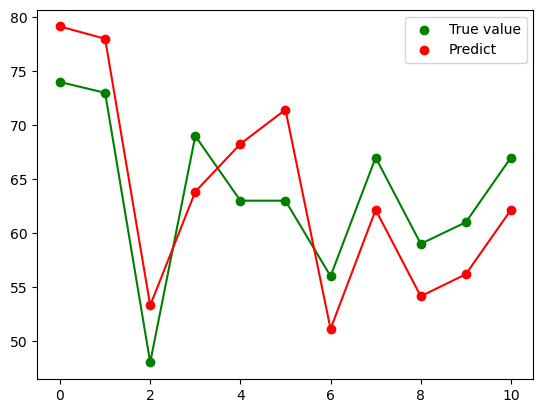

In [437]:
## Hacer que los puntos devuelvan la info del jugador
## poner cada punto de la columna de un color (y_pred=color1, y_test=color2)

x = np.arange(len(tempdf))
plt.scatter(x, tempdf['Overall'], color='g')
plt.scatter(x, tempdf['y_pred'], color='r')
plt.plot(x, tempdf['Overall'], color='g')
plt.plot(x, tempdf['y_pred'], color='r')
plt.legend(['True value', 'Predict'])
plt.show()

In [261]:
tempdf.loc[tempdf.index[8107]]

ID                             140550
Age                                33
Nationality                    France
Overall                            64
Potential                          73
Club           FC Sochaux-Montbéliard
Value                             0.0
Wage                              0.0
Total stat                       1260
y_test                           64.0
y_pred                          72.36
Name: 8107, dtype: object

In [373]:
len(tempdf['Overall']), len(tempdf['y_pred'])

(11, 11)

In [260]:
tempdf['y_test'].isna().sum()

19813

In [247]:
for index, row in mean_error_df.iterrows():
    print(df.loc[df.index[index]])

ID                             140550
Age                                33
Nationality                    France
Overall                            64
Potential                          73
Club           FC Sochaux-Montbéliard
Value                             0.0
Wage                              0.0
Total stat                       1260
Name: 8107, dtype: object
ID                  188125
Age                     22
Nationality    Switzerland
Overall                 42
Potential               52
Club              FC Aarau
Value                  0.0
Wage                   0.0
Total stat             801
Name: 7761, dtype: object
ID                                  255046
Age                                     21
Nationality                         Mexico
Overall                                 68
Potential                               76
Club           Tiburones Rojos de Veracruz
Value                            1000000.0
Wage                                2000.0
Total stat         

In [241]:
for index, row in mean_error_df.iterrows():
    print(index)

8107
7761
15103
15403
9157
8225
7550
18142
7833
8231
8202
18407


In [220]:
mean_error_df

,y_test,y_pred
8107,64,72.36
7761,42,47.54
15103,68,63.04
15403,58,53.53
9157,67,61.50
8225,66,71.45
7550,58,53.41
18142,52,56.54
7833,87,71.28
8231,39,53.88


In [216]:
len(mean_error_df)

12

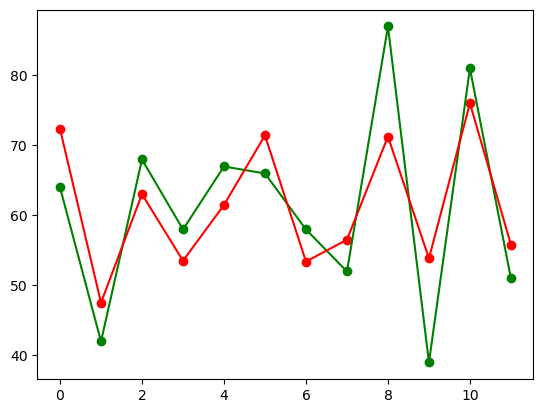

In [219]:
x = np.arange(len(mean_error_df))
plt.scatter(x, mean_error_df['y_test'], color='g')
plt.scatter(x, mean_error_df['y_pred'], color='r')
plt.plot(x, mean_error_df['y_test'], color='g')
plt.plot(x, mean_error_df['y_pred'], color='r')
plt.show()

In [149]:
from sklearn.metrics import r2_score

y_test_mean = np.full(len(y_test), y_test.mean())
r2_score(y_true=y_test,
        y_pred=y_pred)

0.987293217745539

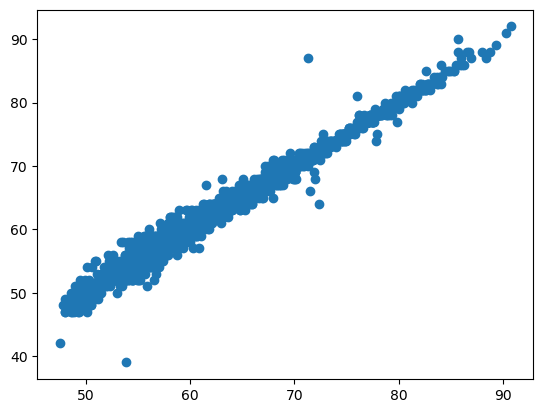

In [146]:
plt.scatter(y_pred, y_test)
plt.show()

In [20]:
y_preds = model.predict(X_test)

In [21]:
y_preds[:10]

array([80.79, 69.06, 72.  , 63.15, 52.  , 58.2 , 49.99, 68.99, 55.52,
       66.18])

In [25]:
np.array(y_test.iloc[:10])

array([81, 69, 72, 63, 52, 57, 50, 69, 55, 66])

In [26]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

0.4553215636822195

In [27]:
df['Overall']

0        72
1        77
2        82
3        79
4        89
         ..
19820    52
19821    71
19822    57
19823    69
19824    64
Name: Overall, Length: 19825, dtype: int64

In [ ]:
print(X_test[6]) # Vemos que el elemento (0, 1096) corresponde al ID del jugador

In [ ]:
for i in range(player_df.shape[0]):
    if player_df.iloc[i]['ID'] == 259027.0:
        print(player_df.iloc[i])
player_df.loc[player_df['ID'] == 259027.0] # Estamos haciendo lo mismo que el loop de arriba, usar una de las 2 opciones

In [ ]:
print(model.predict(X_test[6])) # Coincide exacto, marca 63 y tiene una valoracion de 63 (vease arriba)

In [ ]:
print(X_test[6, 1098]) # el 6 seria la fila en la que estamos y 1098 la columna 'Potential' de la matrix X_test type(scipy.sparse._csr.csr_matrix)

In [ ]:
for i in range(X_test.shape[0]): # Sacamos los ID de jugadores del test que tienen potencial de mas de 90
    if X_test[i, 1098] > 90:
        print(X_test[i, 1096]) # 1096 corresponde a la columna 'ID'

In [ ]:
top_pot_player = [239818.0, 207865.0, 192119.0, 238794.0]

for i in range(player_df.shape[0]): # Vemos en la dataframe original que jugadores eran los de arriba
    if player_df.iloc[i]['ID'] in top_pot_player:
        print(player_df.iloc[i])

In [ ]:
def clean_data(data): # para que no salga el nombre con toda la info de type, object y demas
    data_clean = ''
    for i in data:
        data_clean += i
    return data_clean

for i in range(X_test.shape[0]): # Con un loop comprobamos los jugadores con Pot > 90 si acierta con su Overall
    if X_test[(i, 1096)] in top_pot_player:
        current_player = player_df.loc[player_df['ID'] == X_test[(i, 1096)]]
        crr_ply_name = clean_data(current_player['Name'])
        crr_ply_overall = clean_data(str(current_player['Overall'])[6:9]) # Lo ultimo es porque salia mal los datos
        crr_ply_predict = clean_data(str(model.predict(X_test[i])))
        print(f"{crr_ply_name} | Overall real: {crr_ply_overall} estimado -->  {crr_ply_predict}")

In [1]:
import pickle

# Save trained model to file
pickle.dump(model, open("random_forest_regressor.pkl", "wb"))

# Load a saved model and make a prediction on a single example
loaded_model = pickle.load(open("random_forest_regressor.pkl", "rb"))
loaded_model.predict(X_test[6])

NameError: name 'model' is not defined